In [12]:
import numpy as np
import matplotlib.pyplot as plot

In [13]:
#construct Ah
p=2
n=(2**p)
h=1/(2**p);
Ah=np.zeros([n+1,n+1])
for k in range(1,n):
        Ah[k][k] = 2
for k in range(1,n-1):
        Ah[k][k+1] = -1
        Ah[k+1][k] = -1
Ah[0][0]=h**2
Ah[n][n]=h**2
Ah=Ah/(h**2)       
#b=np.array([1,*np.zeros([n-1])])*h**2        
#Ah=np.vstack((b,Ah))
#Ah=np.vstack((Ah,np.flip(b)))
             

Ih=np.identity(n+1)
x=np.linspace(0,1,n+1)
y=np.linspace(0,1,n+1)
z=np.linspace(0,1,n+1)

xv, yv, zv = np.meshgrid(x, y, z)
#f2=(x^2+y^2)sin(xy)
f2=((xv**2+yv**2)*np.sin(xv*yv))[:,:,1]
ones = np.ones(f2.shape)
ones[1:-1,1:-1] = f2[1:-1,1:-1]
f2 = ones
f3=((xv*yv)**2+(xv*zv)**2+(yv*zv)**2)*np.sin(xv*yv*zv)

f2= f2[::-1,:].flatten()
f3= f3[::-1,::-1,:].flatten()

test3=np.array([])

In [14]:

Ah2=np.kron(Ih,Ah)+np.kron(Ah,Ih)
Ah3=np.kron(Ih,Ah2)+np.kron(Ah2,Ih)
Ah

array([[  1.,   0.,   0.,   0.,   0.],
       [  0.,  32., -16.,   0.,   0.],
       [  0., -16.,  32., -16.,   0.],
       [  0.,   0., -16.,  32.,   0.],
       [  0.,   0.,   0.,   0.,   1.]])

array([[  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,  33., -16.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0., -16.,  33., -16.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0., -16.,  33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  33.,   0.,   0.,   0.,   0., -16.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  

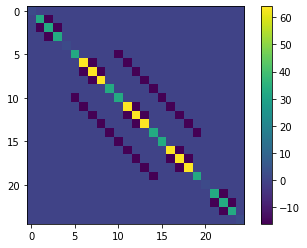

In [15]:
plot.imshow(Ah2[0:10*n,0:10*n])
plot.colorbar()
Ah2

In [16]:
#computing the cholesky factor
#C=np.zeros([(n+1)**2,(n+1)**2])
#for k in range ((n+1)^2):
#    C[k,k] = np.sqrt(Ah2[k,k]-np.sum(C[k,:]))
#    for i in range(k + 1):
#        C[i,k] = (1/C[k,k])*(Ah2[i, k]-np.sum(C[i,:]*C[k,:]))
        
C=np.linalg.cholesky(Ah2)

In [17]:
L=C
U=C.T

y=np.linalg.solve(U,f2)
u=np.linalg.solve(L,y)

In [18]:
np.shape(L)
np.shape(f2)

(25,)

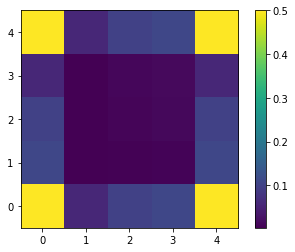

In [19]:
u=u.reshape(n+1,n+1)[::-1,:]
np.shape(u)
plot.imshow(u,origin='lower')
plot.colorbar()

In [20]:
u

array([[0.5       , 0.05829166, 0.0983185 , 0.10923654, 0.5       ],
       [0.10923654, 0.00289296, 0.00660781, 0.00843385, 0.10923654],
       [0.0983185 , 0.00429968, 0.01010849, 0.01367007, 0.0983185 ],
       [0.05829166, 0.00463065, 0.01068909, 0.01486143, 0.05829166],
       [0.5       , 0.05829166, 0.0983185 , 0.10923654, 0.5       ]])

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.06245932, 0.12467473, 0.1864033 , 0.24740396],
       [0.        , 0.12467473, 0.24740396, 0.36627253, 0.47942554],
       [0.        , 0.1864033 , 0.36627253, 0.53330267, 0.68163876],
       [0.        , 0.24740396, 0.47942554, 0.68163876, 0.84147098]])

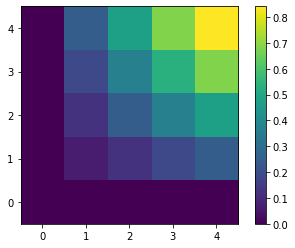

In [21]:
uexact=(np.sin(xv*yv))[:,:,1]
np.shape(uexact)
plot.imshow(uexact,origin='lower')
plot.colorbar()
uexact


In [22]:
error=np.abs(u-uexact)
error

array([[0.5       , 0.05829166, 0.0983185 , 0.10923654, 0.5       ],
       [0.10923654, 0.05956635, 0.11806692, 0.17796944, 0.13816742],
       [0.0983185 , 0.12037506, 0.23729547, 0.35260246, 0.38110704],
       [0.05829166, 0.18177265, 0.35558344, 0.51844124, 0.6233471 ],
       [0.5       , 0.1891123 , 0.38110704, 0.57240222, 0.34147098]])